# **Introducción**


El diseño de un intercambiador de calor y de un sistema de refrigeración son dos aspectos fundamentales en la ingeniería mecánica que desempeñan un papel crucial en una amplia variedad de aplicaciones industriales y comerciales. Estos componentes son esenciales para controlar y gestionar las temperaturas en diferentes procesos y sistemas, garantizando un rendimiento eficiente y seguro.

Un intercambiador de calor es un dispositivo diseñado para transferir calor de un fluido a otro, sin que estos dos fluidos se mezclen entre sí. Este proceso se logra mediante superficies de transferencia de calor, que pueden ser placas, tubos o aletas, que permiten el intercambio de energía térmica entre los fluidos. Los intercambiadores de calor se utilizan en una variedad de aplicaciones, desde sistemas de climatización hasta procesos de fabricación industrial, donde la regulación de la temperatura es crítica.

Por otro lado, el diseño de un sistema de refrigeración implica la creación de un sistema completo que utiliza un ciclo termodinámico para eliminar el calor de un espacio o de un sistema. Este proceso se logra mediante la compresión, expansión y circulación de un refrigerante que absorbe y libera calor en un ciclo continuo. Los sistemas de refrigeración son vitales en aplicaciones como la refrigeración de alimentos, la climatización de edificios, la refrigeración de equipos electrónicos y la refrigeración industrial.

Ambos conceptos están estrechamente relacionados, ya que los intercambiadores de calor son componentes clave en los sistemas de refrigeración, permitiendo la transferencia de calor entre el refrigerante y el entorno que se desea enfriar. En este contexto, los ingenieros mecánicos desempeñan un papel fundamental al diseñar intercambiadores de calor eficientes y sistemas de refrigeración que cumplan con los requisitos de rendimiento, eficiencia energética y seguridad.

En este papel de ingeniero mecánico, exploraremos en detalle los principios de diseño de intercambiadores de calor y sistemas de refrigeración, así como las consideraciones clave en la ingeniería de estos sistemas para lograr un rendimiento óptimo y un uso eficiente de los recursos.

# **Enunciado**

Requerimiento: Enfriar leche para almacenamiento.

1. Especificación cuantitativa de requerimiento:

    1.1 Requerimiento funcionales. 
        
        - $m_l=0.5Kg/s$ 
        - Enfriar desde 80 ºC hasta 10 ºC
        - Se dispone de $m_w=2.5kg/s$ agua proveniente de una torre a 24ºC.

    1.2 Requerimiento no funcionales.

        - Operable y seguro.
        - Costo mínimo.

2. Concepto de diseño:

    2.1 Solo enfriamiento con agua.

    2.2 Solo enfriamiento con un sistema de refrigeración.
    
    2.3 Sistema combinado.

        - Agua primero por SR.
        - Agua primero por pre-enfriador.


#  Diseño solo Intercambiador de calor

El sistema en si mismo no puede realizarse con solo un intercambiador de calor dado que los perfiles de temperatura producirían un proceso imposible en la medida que el fluido frio (Agua) estaría a una temperatura superior a la entrada en comparación a la temperatura del fluido caliente (leche).

<!-- ![](./imgs_leche/maxresdefault.jpg)
![](./imgs_leche/diagrama_solo_intercambioador.jpeg) -->

<p align="center">
  <img src="./imgs_leche/maxresdefault.jpg" height ="400px">
</p>

<p align="center">
  <img src="./imgs_leche/diagrama_solo_intercambioador.jpeg" height ="400px">
</p>



# **Diseño combinado**

## **Carcasa y tubo**

### Importar librerías necesarias

Para el desarrollo del diseño y la optimización los costos del intercambiador de calor como del sistema de refrigerador se utilizo el lenguaje de programación Python en su version 3.10.13 y las siguientes librerías.

1. PyFluids: Obtener las propiedades del agua a las condiciones termo-físicas necesarias.
2. Numpy: Manipular el vector de temperaturas, asi como de la optimización de las operaciones y cálculos necesarios.
3. Scipy: Encontrar la función que mejor estime los datos de costos.
4. Matplotlib: Modelar los resultados obtenidos. 

In [170]:
from pyfluids import Fluid, FluidsList, Input
import numpy as np
from pprint import pprint
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

### Establecer valores conocidos

In [171]:
caudal_leche                              = 0.5 # kg/s
temperatura_entrada_leche                 = 80 # ºC
temperatura_salida_leche                  = 10 # ºC
temperatura_entrada_agua                  = 24 # ºC
caudal_agua                               = 2.5 # kg/s

### Definición de salida temperatura

Se debe parametrizar la velocidad de salida del intercambiador y la entrada del sistema del refrigerador.

<!-- ![](./imgs_leche/esquema_flujo.jpeg) -->

<p align="center">
  <img src="./imgs_leche/esquema_flujo.jpeg" height ="350px">
</p>


In [172]:
temperaturas_leche_estimada_salidas = np.linspace(30, 65, 25)
temperaturas_leche_estimada_salidas

array([30.        , 31.45833333, 32.91666667, 34.375     , 35.83333333,
       37.29166667, 38.75      , 40.20833333, 41.66666667, 43.125     ,
       44.58333333, 46.04166667, 47.5       , 48.95833333, 50.41666667,
       51.875     , 53.33333333, 54.79166667, 56.25      , 57.70833333,
       59.16666667, 60.625     , 62.08333333, 63.54166667, 65.        ])

### Establecer valores pre-diseño

#### Consideraciones

<!-- [presión agua](https://blog.verti.es/hogar/presion-agua-casa/#:~:text=Lo%20habitual%20es%20que%20la,tengamos%20una%20presión%20u%20otra.) -->


- Considere como material el acero inoxidable 304, k = 15 W/m*k.
- Diámetro de tubo de 1 in ( 25.4 mm exterior y 17 mm interior ).
- Longitud de 4m.

In [173]:
k_material                            = 15    # W/ m * k Acero inoxidable
diametro_interior                     = 17e-3 # m
diametro_exterior                     = 25.4e-3 # m

longitud                              = 4 #m               

In [174]:
water = Fluid(FluidsList.Water)
presion_agua  = (2) * 101_325 # Pa
water.name

Water

#### Composición de la leche

In [175]:
cp_propiedades_leche = 3970  # J/kg k
print(f"Calor especifico leche {cp_propiedades_leche} J / (kg*k)")

Calor especifico leche 3970 J / (kg*k)


In [176]:
temperaturas_propiedades_leche = (temperaturas_leche_estimada_salidas + temperatura_entrada_leche) / 2
print(f"Temperaturas de propiedades a iterar {temperaturas_propiedades_leche} ºC")

Temperaturas de propiedades a iterar [55.         55.72916667 56.45833333 57.1875     57.91666667 58.64583333
 59.375      60.10416667 60.83333333 61.5625     62.29166667 63.02083333
 63.75       64.47916667 65.20833333 65.9375     66.66666667 67.39583333
 68.125      68.85416667 69.58333333 70.3125     71.04166667 71.77083333
 72.5       ] ºC


### Termodinámica

$$ \dot{Q} = (\dot{m} *C_{p})_{leche} * (T_{l1} -T_{l2})$$

Se calcula los calores disipados de la leche en el intercambiador a partir del vector de temperaturas.

In [177]:
calores_transferencia = caudal_leche * cp_propiedades_leche * (temperatura_entrada_leche - temperaturas_leche_estimada_salidas)
print(fr" Calores {calores_transferencia} W")

 Calores [99250.         96355.20833333 93460.41666667 90565.625
 87670.83333333 84776.04166667 81881.25       78986.45833333
 76091.66666667 73196.875      70302.08333333 67407.29166667
 64512.5        61617.70833333 58722.91666667 55828.125
 52933.33333333 50038.54166667 47143.75       44248.95833333
 41354.16666667 38459.375      35564.58333333 32669.79166667
 29775.        ] W


In [178]:
estado_agua_propiedades = water.with_state(
    Input.pressure(presion_agua),
    Input.temperature(34),
)
print(estado_agua_propiedades.as_dict())

{'compressibility': 0.0014376012709739205, 'conductivity': 0.6203366408703609, 'critical_pressure': 22064000.0, 'critical_temperature': 373.946, 'density': 994.417937160409, 'dynamic_viscosity': 0.0007337301352239351, 'enthalpy': 142631.9153801642, 'entropy': 491.47808690964223, 'fraction': 100, 'freezing_temperature': None, 'internal_energy': 142428.1278251999, 'kinematic_viscosity': 7.378488538924831e-07, 'max_pressure': 1000000000.0, 'max_temperature': 1726.85, 'min_pressure': 611.6548008968684, 'min_temperature': 0.010000000000047748, 'molar_mass': 0.018015268, 'name': Water, 'phase': Liquid, 'prandtl': 4.942945501085879, 'pressure': 202650, 'quality': None, 'sound_speed': 1518.0155752419128, 'specific_heat': 4179.043576032273, 'specific_volume': 0.0010056133971753675, 'surface_tension': None, 'temperature': 34.0, 'triple_pressure': 611.6548008968684, 'triple_temperature': 0.010000000000047748, 'units_system': SIWithCelsiusAndPercents}


In [179]:
cp_agua                         = estado_agua_propiedades.specific_heat # J /kg k
viscosidad_dinamica_agua        = estado_agua_propiedades.dynamic_viscosity # Pa * s
densidad_agua                   = estado_agua_propiedades.density # kg / m3
k_agua                          = estado_agua_propiedades.conductivity # W / m k
prandl_agua                     = estado_agua_propiedades.prandtl

$$ \dot{Q} = (\dot{m} *C_{p})_{agua} * (T_{w2} - T_{w1})$$


$$ T_{w2} = \frac{\dot{Q}}{(\dot{m} * C_{p})_{agua}}  + T_{w1}$$

In [180]:
temperaturas_salida_agua = temperatura_entrada_agua + calores_transferencia / (caudal_agua * cp_agua)
print(fr"Temperatura salida del agua {temperaturas_salida_agua} ºC")

Temperatura salida del agua [33.4997813  33.22270434 32.94562739 32.66855043 32.39147348 32.11439652
 31.83731957 31.56024261 31.28316566 31.00608871 30.72901175 30.4519348
 30.17485784 29.89778089 29.62070393 29.34362698 29.06655002 28.78947307
 28.51239612 28.23531916 27.95824221 27.68116525 27.4040883  27.12701134
 26.84993439] ºC


### Transferencia de calor

#### Cálculo de una U estimada

Asuma los coeficiente de trasferencia de calor

$$ \frac{1}{U_{ensuciamiento}} = \frac{r_{0}}{r_{i}} \frac{1}{h_{i}} + \frac{r_{0}}{r_{1}}*R_{f_{}i} + r_{0} \frac{ln(\frac{r_{0}}{r_{i}} )}{k} + R_{f_{}o} + \frac{1}{h_{0}} $$



$$ \frac{1}{U_{limpio}} = \frac{r_{0}}{r_{i}} \frac{1}{h_{i}} + r_{0} \frac{ln(\frac{r_{0}}{r_{i}} )}{k} + \frac{1}{h_{0}}$$

En este caso

> $r_{0}$ -> radio exterior

> $r_{i}$ -> radio interior

> $h_{0}$ -> coeficiente de convección en la carcasa

> $h_{i}$ -> coeficiente de convección en el tubo

In [181]:
h_agua        = 3000     # kj/kg * k
h_leche       = 3000     # kj/kg * k

R_f_leche    = 0.000176 # m2 k/w
R_f_agua     = 0.000176 # m2 k/w

In [182]:
U_ensuciamiento = (
    + (diametro_exterior / diametro_interior) * 1 / h_leche
    + (diametro_exterior / diametro_interior) * R_f_leche
    + (diametro_exterior / 2) * np.log(diametro_exterior/diametro_interior) / k_material
    + R_f_agua
    + 1 / h_agua
) ** -1 
U_ensuciamiento

621.0006557923189

In [183]:
U_no_ensuciamiento = (
    + (diametro_exterior / diametro_interior) * 1 / h_leche
    + (diametro_exterior / 2) * np.log(diametro_exterior/diametro_interior) / k_material
    + 1 / h_agua
) ** -1 
U_no_ensuciamiento

853.723413101184

#### Cálculo de la diferencia media logarítmica

<p align="center">
  <img src="./imgs_leche/carcasa_tubo_temperatura.jpeg" height ="350px">
</p>


$$ \Delta{T_{lm,cf}} = \frac{\Delta{T_{1} - \Delta{T_{2}}}}{ \ln{\frac{\Delta{T_{1}}}{\Delta{T_{2}}}} } $$


Donde

- $\Delta{T_{1}} = T_{l1} -  T_{w2}$ 
- $\Delta{T_{2}} = T_{l2} -  T_{w1}$ 

In [184]:
diferencia_temperatura_x1 = temperatura_entrada_leche - temperaturas_salida_agua
diferencia_temperatura_x2 = temperaturas_leche_estimada_salidas - temperatura_entrada_agua
diferencia_log_temperatura = (diferencia_temperatura_x2 - diferencia_temperatura_x1)/ np.log(diferencia_temperatura_x2/diferencia_temperatura_x1)

In [185]:
tabla_temperaturas = pd.DataFrame(
    {
        "Tl1 ºC": temperatura_entrada_leche,
        "Tw2 ºC": temperaturas_salida_agua,
        'Delta x1 ºC' :diferencia_temperatura_x1,
        "Tl2 ºC": temperaturas_leche_estimada_salidas,
        "Tw1 ºC": temperatura_entrada_agua,
        'Delta x2 ºC' :diferencia_temperatura_x2,
        'Diferencia media logarítmica ºC' : diferencia_log_temperatura,
    }
)


Para el calculo de las el factor de corrección se uso las tablas del método de LMTD del moodle.

In [186]:
tabla_temperaturas['R'] = (tabla_temperaturas['Tl1 ºC'] - tabla_temperaturas['Tl2 ºC']) / (tabla_temperaturas['Tw2 ºC'] - tabla_temperaturas['Tw1 ºC'] )
tabla_temperaturas['P'] = 1 / tabla_temperaturas['R'] 

Teniendo en cuenta las gráficas de moodle

In [187]:
F = 0.8

In [188]:
diferencia_log_temperatura_corregida = diferencia_log_temperatura * F
tabla_temperaturas['Diferencia media logarítmica corregida ºC'] = diferencia_log_temperatura_corregida
# print(tabla_temperaturas.to_markdown())

|    |   Tl1 ºC |   Tw2 ºC |   Delta x1 ºC |   Tl2 ºC |   Tw1 ºC |   Delta x2 ºC |   Diferencia media logarítmica ºC |       R |        P |   Diferencia media logarítmica corregida ºC |
|---:|---------:|---------:|--------------:|---------:|---------:|--------------:|----------------------------------:|--------:|---------:|--------------------------------------------:|
|  0 |       80 |  33.4998 |       46.5002 |  30      |       24 |       6       |                           19.7784 | 5.26328 | 0.189996 |                                     15.8227 |
|  1 |       80 |  33.2227 |       46.7773 |  31.4583 |       24 |       7.45833 |                           21.4148 | 5.26328 | 0.189996 |                                     17.1318 |
|  2 |       80 |  32.9456 |       47.0544 |  32.9167 |       24 |       8.91667 |                           22.9278 | 5.26328 | 0.189996 |                                     18.3423 |
|  3 |       80 |  32.6686 |       47.3314 |  34.375  |       24 |      10.375   |                           24.3491 | 5.26328 | 0.189996 |                                     19.4793 |
|  4 |       80 |  32.3915 |       47.6085 |  35.8333 |       24 |      11.8333  |                           25.6989 | 5.26328 | 0.189996 |                                     20.5591 |
|  5 |       80 |  32.1144 |       47.8856 |  37.2917 |       24 |      13.2917  |                           26.9911 | 5.26328 | 0.189996 |                                     21.5929 |
|  6 |       80 |  31.8373 |       48.1627 |  38.75   |       24 |      14.75    |                           28.2359 | 5.26328 | 0.189996 |                                     22.5887 |
|  7 |       80 |  31.5602 |       48.4398 |  40.2083 |       24 |      16.2083  |                           29.4406 | 5.26328 | 0.189996 |                                     23.5525 |
|  8 |       80 |  31.2832 |       48.7168 |  41.6667 |       24 |      17.6667  |                           30.6111 | 5.26328 | 0.189996 |                                     24.4888 |
|  9 |       80 |  31.0061 |       48.9939 |  43.125  |       24 |      19.125   |                           31.7518 | 5.26328 | 0.189996 |                                     25.4014 |
| 10 |       80 |  30.729  |       49.271  |  44.5833 |       24 |      20.5833  |                           32.8665 | 5.26328 | 0.189996 |                                     26.2932 |
| 11 |       80 |  30.4519 |       49.5481 |  46.0417 |       24 |      22.0417  |                           33.9582 | 5.26328 | 0.189996 |                                     27.1665 |
| 12 |       80 |  30.1749 |       49.8251 |  47.5    |       24 |      23.5     |                           35.0292 | 5.26328 | 0.189996 |                                     28.0234 |
| 13 |       80 |  29.8978 |       50.1022 |  48.9583 |       24 |      24.9583  |                           36.0818 | 5.26328 | 0.189996 |                                     28.8655 |
| 14 |       80 |  29.6207 |       50.3793 |  50.4167 |       24 |      26.4167  |                           37.1177 | 5.26328 | 0.189996 |                                     29.6942 |
| 15 |       80 |  29.3436 |       50.6564 |  51.875  |       24 |      27.875   |                           38.1384 | 5.26328 | 0.189996 |                                     30.5107 |
| 16 |       80 |  29.0666 |       50.9334 |  53.3333 |       24 |      29.3333  |                           39.1452 | 5.26328 | 0.189996 |                                     31.3161 |
| 17 |       80 |  28.7895 |       51.2105 |  54.7917 |       24 |      30.7917  |                           40.1392 | 5.26328 | 0.189996 |                                     32.1114 |
| 18 |       80 |  28.5124 |       51.4876 |  56.25   |       24 |      32.25    |                           41.1215 | 5.26328 | 0.189996 |                                     32.8972 |
| 19 |       80 |  28.2353 |       51.7647 |  57.7083 |       24 |      33.7083  |                           42.093  | 5.26328 | 0.189996 |                                     33.6744 |
| 20 |       80 |  27.9582 |       52.0418 |  59.1667 |       24 |      35.1667  |                           43.0544 | 5.26328 | 0.189996 |                                     34.4436 |
| 21 |       80 |  27.6812 |       52.3188 |  60.625  |       24 |      36.625   |                           44.0065 | 5.26328 | 0.189996 |                                     35.2052 |
| 22 |       80 |  27.4041 |       52.5959 |  62.0833 |       24 |      38.0833  |                           44.9498 | 5.26328 | 0.189996 |                                     35.9599 |
| 23 |       80 |  27.127  |       52.873  |  63.5417 |       24 |      39.5417  |                           45.885  | 5.26328 | 0.189996 |                                     36.708  |
| 24 |       80 |  26.8499 |       53.1501 |  65      |       24 |      41       |                           46.8125 | 5.26328 | 0.189996 |                                     37.45   |

#### Cálculo de la relación de area

In [189]:
A_f = calores_transferencia / (U_ensuciamiento * diferencia_log_temperatura_corregida)
A_c = calores_transferencia / (U_no_ensuciamiento * diferencia_log_temperatura_corregida)

print(f"Area con ensuciamiento {A_f} m^2")
print(f"Area sin ensuciamiento {A_c} m^2")

area_ratio =  A_f / A_c - 1
print(f"Relación de area ratio: {area_ratio}")

Area con ensuciamiento [10.1008265   9.05689606  8.20508336  7.4868435   6.86687074  6.3222244
  5.83715399  5.40037681  5.00353339  4.64025753  4.30558911  3.99558834
  3.70707385  3.43743979  3.1845249   2.94651686  2.72188103  2.50930651
  2.30766468  2.11597693  1.93338923  1.75915187  1.59260313  1.43315607
  1.28028769] m^2
Area sin ensuciamiento [7.34736776 6.58801001 5.96839921 5.44594965 4.99497983 4.59880265
 4.24596116 3.9282483  3.63958335 3.37533553 3.13189684 2.90640147
 2.69653527 2.50040275 2.31643179 2.14330412 1.97990342 1.82527615
 1.67860136 1.53916718 1.40635241 1.2796117  1.1584637  1.0424815
 0.93128463] m^2
Relación de area ratio: [0.37475445 0.37475445 0.37475445 0.37475445 0.37475445 0.37475445
 0.37475445 0.37475445 0.37475445 0.37475445 0.37475445 0.37475445
 0.37475445 0.37475445 0.37475445 0.37475445 0.37475445 0.37475445
 0.37475445 0.37475445 0.37475445 0.37475445 0.37475445 0.37475445
 0.37475445]


Se toma como referencia las siguientes dimensiones y parámetros de diseño en base a los valores estándares

In [190]:
Cl         = 1
L          = 4      # m ; Es la longitud 
CTP        = 0.93   # One tube pass
PitchRatio = 1.25

In [191]:
diametro_carcasa = 0.637 * ((Cl / CTP) * A_f * pow(PitchRatio, 2) * diametro_exterior / L)**(1/2) 
print(f"El diámetro de la carcasa {diametro_carcasa} m")

diametro_carcasa = 0.25 # Se aproxima al estándar
print(f"El diámetro de la carcasa estándar {diametro_carcasa} m")

El diámetro de la carcasa [0.20910927 0.19800882 0.18846744 0.18002972 0.17241469 0.16543591
 0.15896277 0.15289978 0.14717473 0.14173133 0.13652467 0.131518
 0.1266807  0.12198667 0.11741326 0.11294039 0.10854989 0.10422495
 0.09994963 0.09570845 0.09148597 0.08726629 0.0830326  0.07876651
 0.07444724] m
El diámetro de la carcasa estándar 0.25 m


In [192]:
numeros_tubos = 0.785 * (CTP/Cl) * (diametro_carcasa)**2 /((PitchRatio * diametro_exterior)**2)
print(numeros_tubos)

45.26319052638105


Se estandariza de acuerdo a los datos estándares de las transparencias. Adicional a esto considere que se eligió un arreglo cuadrado de tubos.

<p align="center">
  <img src="./imgs_leche/estandar_numero_tubos.jpeg" height ="350px">
</p>


In [193]:
numeros_tubos   = 48  # Estándar
D_S             = 0.33655 # 13 1/4 
tubos_pas       = 6

Se supone un 60 %  del diámetro de la carcasa

In [194]:
B = 0.6 * diametro_carcasa
print('espacio entre baffle', B)
B = 0.2
print('espacio entre baffle', B)

espacio entre baffle 0.15
espacio entre baffle 0.2


### Corrección método de kern

#### Cálculo del diámetro equivalente

<p align="center">
  <img src="./imgs_leche/distribucion_tubos_carcasa_tubos.jpeg" height ="300px">
</p>

$$ D_{e} = \frac{4(P_{T}^{2} - \pi{} * d_{0} ^2 / 4)}{\pi{} *d_{0}}  $$

In [195]:
P_t              = 31.75e-3 # m -> Note que esta valor sale en las tablas como 1 in 1.25 in

D_e = 4 * (P_t ** 2 - np.pi * (diametro_exterior**2) / 4) / (np.pi * diametro_exterior)
print(f"calculo del diámetro equivalente del lado del tubo {D_e:.4f} m")

calculo del diámetro equivalente del lado del tubo 0.0251 m


#### Cálculo flujo en la carcasa

En este caso de decide una distribución de poner la leche en los tubos y el agua en la carcasa.

##### Cálculo de la velocidad másica

In [196]:
C = P_t - diametro_exterior
print(f"Holgura C: {C:.5f}")

A_s = (D_S * C * B) / P_t
print(f"Area de flujo cruzado {A_s:4f} m")

Holgura C: 0.00635
Area de flujo cruzado 0.013462 m


In [197]:
G_s = caudal_agua / A_s # carcasa
print(f"Velocidad másica carcasa {G_s:.2f} kg/(s*m2)")

Velocidad másica carcasa 185.71 kg/(s*m2)


##### Cálculo coeficiente convectivo agua

$$ \frac{h_{0}* D_{e}}{k} = 0.36 (\frac{D_{e}G_{s}}{\mu})^{0.55} (\frac{c_{p} \mu }{k})^{\frac{1}{3}} (\frac{\mu_{b}}{\mu_{w}})^{0.14} $$

In [198]:
temperatura_propiedades_agua = np.average(
    (temperaturas_salida_agua + temperatura_entrada_agua) / 2
)

print(temperatura_propiedades_agua)

estado_agua_kern = water.with_state(
    Input.pressure(presion_agua),
    Input.temperature(temperatura_propiedades_agua),
)

densidad_agua_kern            = estado_agua_kern.density
cp_agua_kern                  = estado_agua_kern.specific_heat
viscosidad_dinamica_agua_kern = estado_agua_kern.dynamic_viscosity
k_agua_kern                   = estado_agua_kern.conductivity
prandtl_agua_kern             = estado_agua_kern.prandtl

print(estado_agua_kern.as_dict())
print(
    densidad_agua_kern, cp_agua_kern, 
    viscosidad_dinamica_agua_kern, k_agua_kern, 
)

27.08742892129641
{'compressibility': 0.0014675726384635324, 'conductivity': 0.6099335190015163, 'critical_pressure': 22064000.0, 'critical_temperature': 373.946, 'density': 996.5371137555562, 'dynamic_viscosity': 0.0008492509120536731, 'enthalpy': 113740.71573061732, 'entropy': 396.3412376859475, 'fraction': 100, 'freezing_temperature': None, 'internal_energy': 113537.3615386338, 'kinematic_viscosity': 8.522019906044248e-07, 'max_pressure': 1000000000.0, 'max_temperature': 1726.85, 'min_pressure': 611.6548008968684, 'min_temperature': 0.010000000000047748, 'molar_mass': 0.018015268, 'name': Water, 'phase': Liquid, 'prandtl': 5.820473548702529, 'pressure': 202650, 'quality': None, 'sound_speed': 1502.2937057792478, 'specific_heat': 4180.274478870396, 'specific_volume': 0.001003474919495365, 'surface_tension': None, 'temperature': 27.087428921296407, 'triple_pressure': 611.6548008968684, 'triple_temperature': 0.010000000000047748, 'units_system': SIWithCelsiusAndPercents}
996.5371137555

In [199]:
Re_agua = G_s * D_e / viscosidad_dinamica_agua_kern
print(f'Reynolds leche: {Re_agua:.2f}')

Reynolds leche: 5495.61


In [200]:
T_w = 1/4 * np.average(
    (temperatura_entrada_agua + temperaturas_salida_agua) +
    (temperatura_entrada_leche + temperaturas_leche_estimada_salidas) 
)

estado_agua_prom_kern = water.with_state(
    Input.pressure(presion_agua),
    Input.temperature(T_w),
)

viscosidad_dinamica_agua_prom_kern = estado_agua_prom_kern.dynamic_viscosity
viscosidad_dinamica_agua_prom_kern
print(f'Temperatura promedio {T_w:.2f} ºC')

Temperatura promedio 45.42 ºC


In [201]:
h_agua = 0.36 * (D_e * G_s / viscosidad_dinamica_agua_kern)**0.55 \
    * (cp_agua_kern * viscosidad_dinamica_agua_kern / k_agua_kern)**(1/3) \
    * (viscosidad_dinamica_agua_kern / viscosidad_dinamica_agua_prom_kern)**0.14 \
    * k_agua / D_e
print(f'Coeficiente de convección del agua {h_agua:.2f} W/(m^2 k)')

Coeficiente de convección del agua 1917.37 W/(m^2 k)


In [202]:
densidad_leche_kern            = 1030 # kg / m3
cp_leche_kern                  = 3900 # J/kg K
viscosidad_dinamica_leche_kern = 0.0008 # Pa * S
k_leche_kern                   = 0.6 # W /m k
prandtl_leche_kern             = 5.1

print(
    densidad_leche_kern, cp_leche_kern, viscosidad_dinamica_leche_kern, 
    k_leche_kern, 
    prandtl_leche_kern
)

1030 3900 0.0008 0.6 5.1


In [203]:
Re_leche = G_s * D_e / viscosidad_dinamica_leche_kern
print(f'Reynolds leche: {Re_leche:.2f}')

Reynolds leche: 5833.94


##### Cálculo coeficiente convectivo leche

In [204]:
A_tp = np.pi * diametro_interior**2 / 4 * numeros_tubos  / 6
print(f"Area de transferencia por tubo {A_tp:.5f} m^2")

Area de transferencia por tubo 0.00182 m^2


In [205]:
u_m_leche = caudal_leche / (densidad_leche_kern * A_tp)
print(f"Velocidad media agua {u_m_leche:.2f} (m/s)")

Velocidad media agua 0.27 (m/s)


In [206]:
Re_leche = densidad_leche_kern * u_m_leche * diametro_interior / viscosidad_dinamica_leche_kern
print(f"Reynolds leche {Re_leche:.2f}")

Reynolds leche 5851.28


##### Como el fluido es turbulento se usa correlación de  Grielinki's

In [207]:
f = (1.58*np.log(Re_leche) - 3.28)**-2
f

0.009200251682139698

In [208]:
Nu_b = (f/2)*(Re_leche - 1000)*prandtl_leche_kern/(1 + 12.7*(f/2)**(1/2)*(prandtl_leche_kern**(2/3) - 1))
Nu_b

42.29821473816366

In [209]:
h_leche = Nu_b * k_leche_kern / diametro_interior
print(f"Coeficiente de convección leche {h_leche:.2f} W/(m^2 * k)")

Coeficiente de convección leche 1492.88 W/(m^2 * k)


#### Corrección del area

In [210]:
U_ensuciamiento_real = (
    (diametro_exterior / diametro_interior) * 1 / h_agua
    + (diametro_exterior / diametro_interior) * R_f_agua
    + (diametro_exterior / 2) * np.log(diametro_exterior/diametro_interior) / k_material
    + R_f_leche
    + 1 / h_leche
) ** -1 
U_ensuciamiento_real

448.8265706163582

In [211]:
U_no_ensuciamiento_real = (
    (diametro_exterior / diametro_interior) * 1 / h_agua
    + (diametro_exterior / 2) * np.log(diametro_exterior/diametro_interior) / k_material
    + 1 / h_leche
) ** -1 
U_no_ensuciamiento_real

558.9504406540038

In [212]:
f = np.e**(0.576 - 0.19*np.log(Re_agua))
print(f)

N_b = longitud / B - 1 
print(N_b)

sigma = (viscosidad_dinamica_agua_kern / viscosidad_dinamica_leche_kern)**0.14
print(sigma)

diferencia_presion = f * G_s ** 2 * (N_b + 1) * 0.39 / (sigma * 2 * densidad_agua_kern * D_e)
print(f"La diferencia de presión: {diferencia_presion:.2f} Pa")

0.34637819843913564
19.0
1.008399089550083
La diferencia de presión: 1844.71 Pa


In [213]:
areas = calores_transferencia / (U_ensuciamiento_real * diferencia_log_temperatura_corregida)

calores_lmtd = U_ensuciamiento * areas * F * diferencia_log_temperatura_corregida
print(calores_lmtd)

areas = areas
areas_ft = areas * 10.764
areas_ft

[109858.58524864 106654.37651222 103450.1677758  100245.95903938
  97041.75030296  93837.54156654  90633.33283012  87429.12409371
  84224.91535729  81020.70662087  77816.49788445  74612.28914803
  71408.08041161  68203.87167519  64999.66293878  61795.45420236
  58591.24546594  55387.03672952  52182.8279931   48978.61925668
  45774.41052026  42570.20178385  39365.99304743  36161.78431101
  32957.57557459]


array([150.43334058, 134.88590563, 122.19971306, 111.50284371,
       102.26948309,  94.15797182,  86.93373499,  80.42873767,
        74.51848056,  69.1081509 ,  64.12387673,  59.50698211,
        55.21008643,  51.19438013,  47.42767532,  43.88298078,
        40.53744085,  37.37153203,  34.36844565,  31.51360713,
        28.79429726,  26.19935035,  23.71891144,  21.34423911,
        19.06754409])

#### Calculo Costo intercambiador

In [214]:
tabla_costos = pd.DataFrame(
    {
        "Tl1 ºC": temperatura_entrada_leche,
        "Tw2 ºC": temperaturas_salida_agua,
        "Tl2 ºC": temperaturas_leche_estimada_salidas,
        "Tw1 ºC": temperatura_entrada_agua,
        "Area ft^2": areas_ft,
    }
)
tabla_costos

,Tl1 ºC,Tw2 ºC,Tl2 ºC,Tw1 ºC,Area ft^2
0,80,33.499781,30.000000,24,150.433341
1,80,33.222704,31.458333,24,134.885906
2,80,32.945627,32.916667,24,122.199713
3,80,32.668550,34.375000,24,111.502844
4,80,32.391473,35.833333,24,102.269483
5,80,32.114397,37.291667,24,94.157972
6,80,31.837320,38.750000,24,86.933735
7,80,31.560243,40.208333,24,80.428738
8,80,31.283166,41.666667,24,74.518481
9,80,31.006089,43.125000,24,69.108151


In [215]:
precios_matches = [
    16100,
    17000,
    17800,
    18700,
    19600,
    20400,
    21200,
    22100,
    23000,
    23800,
    24700,
    25600,
    26500,
    27500,
    28500,
    29500,
    30600,
    31700,
    32900,
    34100,
    35800,
    38000,
    40400,
    43200,
    46600
]
tabla_costos['costo_intercambiador matches'] = precios_matches[::-1]
tabla_costos

,Tl1 ºC,Tw2 ºC,Tl2 ºC,Tw1 ºC,Area ft^2,costo_intercambiador matches
0,80,33.499781,30.000000,24,150.433341,46600
1,80,33.222704,31.458333,24,134.885906,43200
2,80,32.945627,32.916667,24,122.199713,40400
3,80,32.668550,34.375000,24,111.502844,38000
4,80,32.391473,35.833333,24,102.269483,35800
5,80,32.114397,37.291667,24,94.157972,34100
6,80,31.837320,38.750000,24,86.933735,32900
7,80,31.560243,40.208333,24,80.428738,31700
8,80,31.283166,41.666667,24,74.518481,30600
9,80,31.006089,43.125000,24,69.108151,29500


In [216]:
tabla_costos['costo_intercambiador_especifico'] = tabla_costos['costo_intercambiador matches'] / tabla_costos['Area ft^2']
tabla_costos.head()

,Tl1 ºC,Tw2 ºC,Tl2 ºC,Tw1 ºC,Area ft^2,costo_intercambiador matches,costo_intercambiador_especifico
0,80,33.499781,30.000000,24,150.433341,46600,309.771756
1,80,33.222704,31.458333,24,134.885906,43200,320.270675
2,80,32.945627,32.916667,24,122.199713,40400,330.606341
3,80,32.668550,34.375000,24,111.502844,38000,340.798483
4,80,32.391473,35.833333,24,102.269483,35800,350.055549


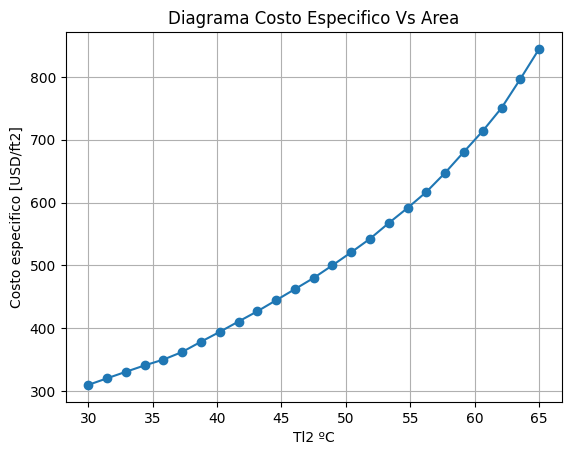

In [217]:
plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['costo_intercambiador_especifico'],
    marker='o'
)
plt.xlabel('Tl2 ºC')
plt.ylabel('Costo especifico [USD/ft2]')
plt.title("Diagrama Costo Especifico Vs Area")
plt.grid(True)
plt.show()

In [218]:
# Define the power law function
def power_law(x, A, B):
    return A * (x ** B)

In [219]:
# Perform curve fitting to find A and B
params, covariance = curve_fit(
    power_law, 
    tabla_costos['Area ft^2'].to_numpy(),
    tabla_costos["costo_intercambiador_especifico"].to_numpy()
)

In [220]:
# Extract the values of A and B
K, n = params

m = 1 + n
print("k =", K)
print("m =", m)
print("n =", n)

k = 3843.829414371575
m = 0.48378487872182585
n = -0.5162151212781741


In [278]:
tabla_costos['costo_prediccion_intercambiador'] =  K * (tabla_costos['Area ft^2'] ** (m))

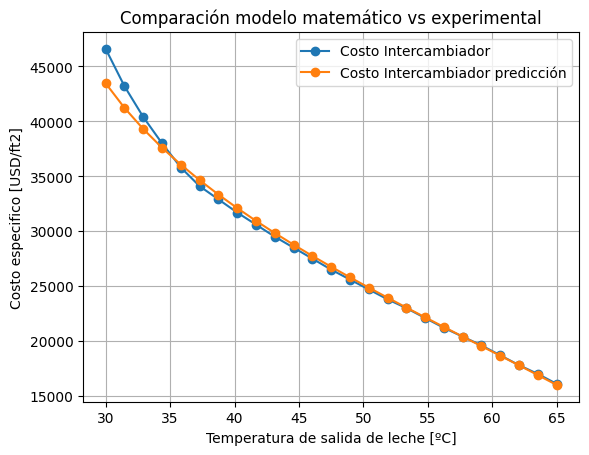

In [222]:
plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['costo_intercambiador matches'],
    marker='o',
    label='Costo Intercambiador'
)

plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['costo_prediccion_intercambiador'],
    marker='o',
    label='Costo Intercambiador predicción'
)

plt.xlabel('Temperatura de salida de leche [ºC]')
plt.ylabel('Costo especifico [USD/ft2]')
plt.title("Comparación modelo matemático vs experimental")
plt.legend()
plt.grid()
plt.show()

### Cálculo  Ciclo refrigerador

<!-- <p align="center">
  <img src="ciclo_refrigerador.jpg" height ="300px">
</p> -->

![](ciclo_refrigerador.jpg)

#### Costo del refrigerador

$$ \dot{Q} = (\dot{m} *C_{p})_{leche} * (T_{entrada} -T_{salida})$$

$$ (n  Watts )\frac{3.41 Btu/h}{1 Watts} *\frac{1 MBtu/h}{1*10^{6}Btu/h}$$

In [223]:
calores_refrigerador = caudal_leche * cp_leche_kern * (temperaturas_leche_estimada_salidas - temperatura_salida_leche)
print(f"Calor transmitido al refrigerador {calores_refrigerador} W")

calores_refrigerador_ingles = calores_refrigerador * 3.41214 / 1e6
print(f"Calor transmitido al refrigerador {calores_refrigerador_ingles} M Btu/h")

Calor transmitido al refrigerador [ 39000.    41843.75  44687.5   47531.25  50375.    53218.75  56062.5
  58906.25  61750.    64593.75  67437.5   70281.25  73125.    75968.75
  78812.5   81656.25  84500.    87343.75  90187.5   93031.25  95875.
  98718.75 101562.5  104406.25 107250.  ] W
Calor transmitido al refrigerador [0.13307346 0.14277673 0.15248001 0.16218328 0.17188655 0.18158983
 0.1912931  0.20099637 0.21069964 0.22040292 0.23010619 0.23980946
 0.24951274 0.25921601 0.26891928 0.27862256 0.28832583 0.2980291
 0.30773238 0.31743565 0.32713892 0.3368422  0.34654547 0.35624874
 0.36595202] M Btu/h


In [224]:
tabla_costos['costo_refrigeradores'] = [
    41100,
    43200,
    45200,
    47200,
    49100,
    51000,
    52900,
    54800,
    56600,
    58400,
    60100,
    61900,
    63600,
    65300,
    67000,
    68700,
    70400,
    72000,
    73600,
    75200,
    76800,
    78400,
    80000,
    81500,
    83000
][::1]

#### Costo energético del compresor

In [225]:
n = 5 # 5 añoS
g = 0.08
i = 0.2 

PSA = (
    1 - ((1 + g) / (1 + i)) ** n
) / (i - g)
PSA

3.4125833333333295

In [227]:
COP = 1

trabajo_compresor = calores_refrigerador * COP
# print(f"Trabajo compresor {trabajo_compresor} W")

trabajo_compresor_hp = trabajo_compresor  / 745.7
print(f"Trabajo compresor {trabajo_compresor_hp} hp")

horas = 300 * 24
CEE = 0.25

C_q = trabajo_compresor_hp * horas * CEE * PSA / 1000


Trabajo compresor [ 52.29985249  56.1133834   59.92691431  63.74044522  67.55397613
  71.36750704  75.18103795  78.99456886  82.80809977  86.62163068
  90.43516159  94.2486925   98.06222341 101.87575432 105.68928524
 109.50281615 113.31634706 117.12987797 120.94340888 124.75693979
 128.5704707  132.38400161 136.19753252 140.01106343 143.82459434] hp


In [281]:
tabla_costos['Costo Total'] = tabla_costos['costo_prediccion_intercambiador'] \
                            + tabla_costos['costo_refrigeradores'] \
                            + C_q

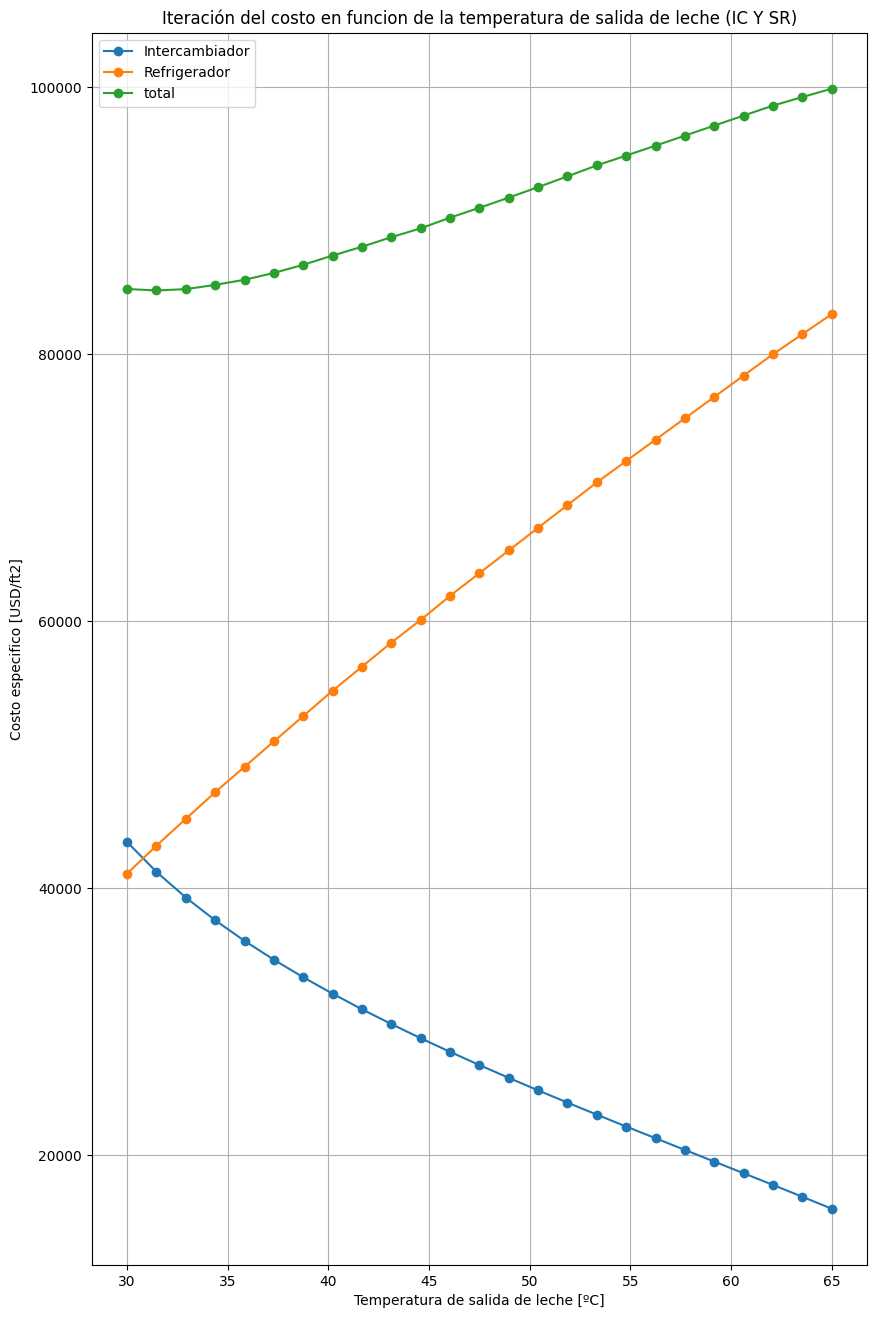

In [229]:
plt.figure(figsize=(10,16))

plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['costo_prediccion_intercambiador'],
    marker='o',
    label='Intercambiador'
)

plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['costo_refrigeradores'],
    marker='o',
    label='Refrigerador'
)

plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['Costo Total'],
    marker='o',
    label='total'
)



plt.xlabel('Temperatura de salida de leche [ºC]')
plt.ylabel('Costo especifico [USD/ft2]')

plt.title('Iteración del costo en funcion de la temperatura de salida de leche (IC Y SR)')
plt.legend()
plt.grid()
plt.show()

### **Doble tubo**

### Importar librerías necesarias

Para el desarrollo del diseño y la optimización los costos del intercambiador de calor como del sistema de refrigerador se utilizo el lenguaje de programación Python en su version 3.10.13 y las siguientes librerías.

1. PyFluids: Obtener las propiedades del agua a las condiciones termo-físicas necesarias.
2. Numpy: Manipular el vector de temperaturas, asi como de la optimización de las operaciones y cálculos necesarios.
3. Scipy: Encontrar la función que mejor estime los datos de costos.
4. Matplotlib: Modelar los resultados obtenidos. 

In [230]:
from pyfluids import Fluid, FluidsList, Input
import numpy as np
from pprint import pprint
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

### Establecer valores conocidos

In [231]:
caudal_leche                              = 0.5 # kg/s
temperatura_entrada_leche                 = 80 # ºC
temperatura_salida_leche                  = 10 # ºC
temperatura_entrada_agua                  = 24 # ºC
caudal_agua                               = 2.5 # kg/s

### Definición de salida temperatura

Se debe parametrizar la velocidad de salida del intercambiador y la entrada del sistema del refrigerador.

<!-- ![](./imgs_leche/esquema_flujo.jpeg) -->

<p align="center">
  <img src="./imgs_leche/esquema_flujo.jpeg" height ="350px">
</p>


In [232]:
temperaturas_leche_estimada_salidas = np.linspace(30, 65, 25)
temperaturas_leche_estimada_salidas

array([30.        , 31.45833333, 32.91666667, 34.375     , 35.83333333,
       37.29166667, 38.75      , 40.20833333, 41.66666667, 43.125     ,
       44.58333333, 46.04166667, 47.5       , 48.95833333, 50.41666667,
       51.875     , 53.33333333, 54.79166667, 56.25      , 57.70833333,
       59.16666667, 60.625     , 62.08333333, 63.54166667, 65.        ])

### Establecer valores pre-diseño

#### Consideraciones

<!-- [presión agua](https://blog.verti.es/hogar/presion-agua-casa/#:~:text=Lo%20habitual%20es%20que%20la,tengamos%20una%20presión%20u%20otra.) -->


- Considere como material el acero inoxidable 304, k = 15 W/m*k.
- Diámetro de tubo exterior: 
    - Exterior : 2in 


In [233]:
k_material                            = 15    # W/ m * k Acero inoxidable

diametro_interior_od                  = 60.3e-3 # m
diametro_interior_id                  = 52.5e-3 # m

diametro_exterior_id                  = 77.9e-3 # m  

fin_height                            = 0.9e-3 # m
aletas_tubo                           = 30
numero_tubos_dentro_anular            = 1
L                                     = 4      #  m Longitud

In [234]:
water = Fluid(FluidsList.Water)
presion_agua  = (2) * 101_325 # Pa
water.name

Water

#### Composición de la leche

In [235]:
cp_propiedades_leche = 3970  # J/kg k
print(f"Calor especifico leche {cp_propiedades_leche} J / (kg*k)")

Calor especifico leche 3970 J / (kg*k)


### Termodinámica

$$ \dot{Q} = (\dot{m} *C_{p})_{leche} * (T_{l1} -T_{l2})$$

Se calcula los calores disipados de la leche en el intercambiador a partir del vector de temperaturas.

In [236]:
calores_transferencia = caudal_leche * cp_propiedades_leche * (temperatura_entrada_leche - temperaturas_leche_estimada_salidas)
print(fr" Calores {calores_transferencia} W")

 Calores [99250.         96355.20833333 93460.41666667 90565.625
 87670.83333333 84776.04166667 81881.25       78986.45833333
 76091.66666667 73196.875      70302.08333333 67407.29166667
 64512.5        61617.70833333 58722.91666667 55828.125
 52933.33333333 50038.54166667 47143.75       44248.95833333
 41354.16666667 38459.375      35564.58333333 32669.79166667
 29775.        ] W


In [237]:
estado_agua_propiedades = water.with_state(
    Input.pressure(presion_agua),
    Input.temperature(34),
)
print(estado_agua_propiedades.as_dict())

{'compressibility': 0.0014376012709739205, 'conductivity': 0.6203366408703609, 'critical_pressure': 22064000.0, 'critical_temperature': 373.946, 'density': 994.417937160409, 'dynamic_viscosity': 0.0007337301352239351, 'enthalpy': 142631.9153801642, 'entropy': 491.47808690964223, 'fraction': 100, 'freezing_temperature': None, 'internal_energy': 142428.1278251999, 'kinematic_viscosity': 7.378488538924831e-07, 'max_pressure': 1000000000.0, 'max_temperature': 1726.85, 'min_pressure': 611.6548008968684, 'min_temperature': 0.010000000000047748, 'molar_mass': 0.018015268, 'name': Water, 'phase': Liquid, 'prandtl': 4.942945501085879, 'pressure': 202650, 'quality': None, 'sound_speed': 1518.0155752419128, 'specific_heat': 4179.043576032273, 'specific_volume': 0.0010056133971753675, 'surface_tension': None, 'temperature': 34.0, 'triple_pressure': 611.6548008968684, 'triple_temperature': 0.010000000000047748, 'units_system': SIWithCelsiusAndPercents}


In [238]:
cp_agua                         = estado_agua_propiedades.specific_heat # J /kg k
viscosidad_dinamica_agua        = estado_agua_propiedades.dynamic_viscosity # Pa * s
densidad_agua                   = estado_agua_propiedades.density # kg / m3
k_agua                          = estado_agua_propiedades.conductivity # W / m k
prandl_agua                     = estado_agua_propiedades.prandtl

$$ \dot{Q} = (\dot{m} *C_{p})_{agua} * (T_{w2} - T_{w1})$$


$$ T_{w2} = \frac{\dot{Q}}{(\dot{m} * C_{p})_{agua}}  + T_{w1}$$

In [239]:
temperaturas_salida_agua = temperatura_entrada_agua + calores_transferencia / (caudal_agua * cp_agua)
print(fr"Temperatura salida del agua {temperaturas_salida_agua} ºC")

Temperatura salida del agua [33.4997813  33.22270434 32.94562739 32.66855043 32.39147348 32.11439652
 31.83731957 31.56024261 31.28316566 31.00608871 30.72901175 30.4519348
 30.17485784 29.89778089 29.62070393 29.34362698 29.06655002 28.78947307
 28.51239612 28.23531916 27.95824221 27.68116525 27.4040883  27.12701134
 26.84993439] ºC


### Cálculo coeficiente convectivo leche

In [240]:
densidad_leche            = 1030 # kg / m3
cp_leche                  = 3900 # J/kg K
viscosidad_dinamica_leche = 0.0008 # Pa * S
k_leche                   = 0.6 # W /m k
prandtl_leche             = 5.1

print(
    densidad_leche, cp_leche, viscosidad_dinamica_leche, 
    k_leche, 
    prandtl_leche
)

1030 3900 0.0008 0.6 5.1


In [241]:
area = lambda d : np.pi * d**2 / 4

In [242]:
def nusselt(f, Re, Pr):
    return ((f/2)*Re*Pr)/(1+8.7*(f/2)**(1/2) *(Pr-1))

friction_factor = lambda Re : (1.58*np.log(Re)-3.28)**-2

In [243]:
area_leche_interior = area(diametro_interior_id)
u_m_leche = caudal_leche / (area_leche_interior * densidad_leche)

Re_leche = (densidad_leche * u_m_leche * diametro_interior_id) / (viscosidad_dinamica_leche)
print(Re_leche)

15157.613627799556


$$ Nu_{b} = \frac{(f/2)*(Re_{b})Pr_{b}}{1+8.7(f/2)^{\frac{1}{2}} (Pr_{b}-1)}   $$

In [244]:
f = friction_factor(Re_leche)
Nu_leche_b = nusselt(f, Re_leche, prandtl_leche)
h_leche = Nu_leche_b * k_leche / diametro_interior_id
print(h_leche)

996.6877260987835


### Cálculo coeficiente convectivo agua

In [245]:
estado_agua_propiedades = water.with_state(
    Input.pressure(presion_agua),
    Input.temperature(34),
)
print(estado_agua_propiedades.as_dict())

{'compressibility': 0.0014376012709739205, 'conductivity': 0.6203366408703609, 'critical_pressure': 22064000.0, 'critical_temperature': 373.946, 'density': 994.417937160409, 'dynamic_viscosity': 0.0007337301352239351, 'enthalpy': 142631.9153801642, 'entropy': 491.47808690964223, 'fraction': 100, 'freezing_temperature': None, 'internal_energy': 142428.1278251999, 'kinematic_viscosity': 7.378488538924831e-07, 'max_pressure': 1000000000.0, 'max_temperature': 1726.85, 'min_pressure': 611.6548008968684, 'min_temperature': 0.010000000000047748, 'molar_mass': 0.018015268, 'name': Water, 'phase': Liquid, 'prandtl': 4.942945501085879, 'pressure': 202650, 'quality': None, 'sound_speed': 1518.0155752419128, 'specific_heat': 4179.043576032273, 'specific_volume': 0.0010056133971753675, 'surface_tension': None, 'temperature': 34.0, 'triple_pressure': 611.6548008968684, 'triple_temperature': 0.010000000000047748, 'units_system': SIWithCelsiusAndPercents}


In [246]:
cp_agua                         = estado_agua_propiedades.specific_heat # J /kg k
viscosidad_dinamica_agua        = estado_agua_propiedades.dynamic_viscosity # Pa * s
densidad_agua                   = estado_agua_propiedades.density # kg / m3
k_agua                          = estado_agua_propiedades.conductivity # W / m k
prandl_agua                     = estado_agua_propiedades.prandtl

In [247]:
area_agua_interior = area(diametro_interior_od)
area_agua_exterior = area(diametro_exterior_id)

print(
    area_agua_interior,
    area_agua_exterior
)
u_m_agua = caudal_agua / ((area_agua_exterior - area_agua_interior)*densidad_agua)

0.0028557784079478277 0.004766118068742709


In [248]:
diametro_hidraulico = diametro_exterior_id - diametro_interior_od
Re_agua = densidad_agua * u_m_agua * diametro_hidraulico / viscosidad_dinamica_agua

print(f'Reynolds del agua = {Re_agua}')

Reynolds del agua = 31391.041697394423


In [249]:
f_agua = friction_factor(Re_agua)
Nu_agua = nusselt(f_agua, Re_agua, prandl_agua)
print(f"Nusselt agua = {Nu_agua}")

Nusselt agua = 158.8667573511342


In [250]:
diametro_equivalente   = (diametro_exterior_id**2 - diametro_interior_od**2)/(diametro_interior_od)
print(f"Diametro equivalente {diametro_equivalente}")

h_agua = Nu_agua*k_agua/diametro_equivalente
print(f"Coeficiente de convección agua {h_agua}")

Diametro equivalente 0.04033698175787728
Coeficiente de convección agua 2443.1890118284223


In [251]:
R_f_leche    = 0.000176 # m2 k/w
R_f_agua     = 0.000176 # m2 k/w

Asuma los coeficiente de trasferencia de calor

$$ \frac{1}{U_{ensuciamiento}} = \frac{r_{0}}{r_{i}} \frac{1}{h_{i}} + \frac{r_{0}}{r_{1}}*R_{f_{}i} + r_{0} \frac{ln(\frac{r_{0}}{r_{i}} )}{k} + R_{f_{}o} + \frac{1}{h_{0}} $$



$$ \frac{1}{U_{limpio}} = \frac{r_{0}}{r_{i}} \frac{1}{h_{i}} + r_{0} \frac{ln(\frac{r_{0}}{r_{i}} )}{k} + \frac{1}{h_{0}}$$

En este caso

> $r_{0}$ -> radio exterior

> $r_{i}$ -> radio interior

> $h_{0}$ -> coeficiente de convección en la carcasa

> $h_{i}$ -> coeficiente de convección en el tubo

In [252]:
U_ensuciamiento = (
    (diametro_interior_od / diametro_interior_id) * 1 / h_leche
    + (diametro_interior_od / diametro_interior_id) * R_f_leche
    + (diametro_interior_od / 2) * np.log(diametro_interior_od/diametro_interior_id) / k_material
    + R_f_agua
    + 1 / h_agua
) ** -1 
U_ensuciamiento

450.80353841085014

In [253]:
diferencia_temperatura_x1 = temperatura_entrada_leche - temperaturas_salida_agua
diferencia_temperatura_x2 = temperaturas_leche_estimada_salidas - temperatura_entrada_agua
diferencia_log_temperatura = (diferencia_temperatura_x2 - diferencia_temperatura_x1)/ np.log(diferencia_temperatura_x2/diferencia_temperatura_x1)
diferencia_log_temperatura

array([19.77841834, 21.41478731, 22.92781504, 24.34908175, 25.69888119,
       26.99113718, 28.23587612, 29.4405915 , 30.61105153, 31.75180436,
       32.86650828, 33.9581557 , 35.02922975, 36.08181671, 37.1176885 ,
       38.13836453, 39.14515871, 40.13921593, 41.12154058, 42.09301922,
       43.0544388 , 44.00650139, 44.94983628, 45.88500996, 46.81253435])

#### Area de transferencia de calor

In [254]:
A_0 = calores_transferencia /(U_ensuciamiento * diferencia_log_temperatura)
A_0

array([11.13144746,  9.98100132,  9.04227534,  8.25075107,  7.56752043,
        6.96730201,  6.43273825,  5.95139524,  5.51406057,  5.11371846,
        4.7449027 ,  4.40327152,  4.08531894,  3.78817322,  3.50945258,
        3.24715979,  2.99960362,  2.76533941,  2.54312339,  2.3318771 ,
        2.13065937,  1.93864399,  1.75510173,  1.57938576,  1.41091971])

In [255]:
A_hp = 2 * np.pi * diametro_interior_od * longitud
A_hp

1.5155042960917162

In [256]:
N_hp = A_0 / A_hp
N_hp

array([7.34504514, 6.58592744, 5.96651251, 5.4442281 , 4.99340084,
       4.5973489 , 4.24461894, 3.92700651, 3.63843282, 3.37426853,
       3.1309068 , 2.90548271, 2.69568285, 2.49961233, 2.31569953,
       2.14262658, 1.97927754, 1.82469916, 1.67807072, 1.53868063,
       1.40590784, 1.27920719, 1.1580975 , 1.04215195, 0.93099024])

In [257]:
U_no_ensuciamiento = (
    (diametro_interior_od / diametro_interior_id) * 1 / h_leche
    + (diametro_interior_od / 2) * np.log(diametro_interior_od/diametro_interior_id) / k_material
    + 1 / h_agua
) ** -1 
U_no_ensuciamiento

543.4449947018621

In [258]:
CF = U_ensuciamiento / U_no_ensuciamiento
1 - CF

0.1704707140450079

In [259]:
R_fr = (1-CF)/(U_no_ensuciamiento *CF)
R_fr

0.000378148571428571

In [260]:
OS = 100 * U_no_ensuciamiento * R_fr
print(f"Porcentaje sobre la superficie : {OS}")

Porcentaje sobre la superficie : 20.550294839651652


In [261]:
diferencia_presion = 4 * f* 2 * L / diametro_interior_id * N_hp * densidad_leche

In [262]:
areas_ft = areas * 10.764
areas_ft

array([150.43334058, 134.88590563, 122.19971306, 111.50284371,
       102.26948309,  94.15797182,  86.93373499,  80.42873767,
        74.51848056,  69.1081509 ,  64.12387673,  59.50698211,
        55.21008643,  51.19438013,  47.42767532,  43.88298078,
        40.53744085,  37.37153203,  34.36844565,  31.51360713,
        28.79429726,  26.19935035,  23.71891144,  21.34423911,
        19.06754409])

In [263]:
tabla_costos = pd.DataFrame(
    {
        "Tl1 ºC": temperatura_entrada_leche,
        "Tw2 ºC": temperaturas_salida_agua,
        "Tl2 ºC": temperaturas_leche_estimada_salidas,
        "Tw1 ºC": temperatura_entrada_agua,
        "Area ft^2": areas_ft,
    }
)
tabla_costos

,Tl1 ºC,Tw2 ºC,Tl2 ºC,Tw1 ºC,Area ft^2
0,80,33.499781,30.000000,24,150.433341
1,80,33.222704,31.458333,24,134.885906
2,80,32.945627,32.916667,24,122.199713
3,80,32.668550,34.375000,24,111.502844
4,80,32.391473,35.833333,24,102.269483
5,80,32.114397,37.291667,24,94.157972
6,80,31.837320,38.750000,24,86.933735
7,80,31.560243,40.208333,24,80.428738
8,80,31.283166,41.666667,24,74.518481
9,80,31.006089,43.125000,24,69.108151


In [264]:
tabla_costos['costo_intercambiador matches'] = [ 
    24300,
    25400,
    26400,
    27400,
    28300,
    29300,
    30200,
    31200,
    32100,
    33100,
    34000,
    35000,
    36000,
    37000,
    38000,
    39100,
    40200,
    41300,
    42500,
    43800,
    45100,
    46600,
    48100,
    49900,
    52000,
][::-1]

In [265]:
tabla_costos['costo_intercambiador_especifico'] = tabla_costos['costo_intercambiador matches'] / tabla_costos['Area ft^2']
tabla_costos.head()

,Tl1 ºC,Tw2 ºC,Tl2 ºC,Tw1 ºC,Area ft^2,costo_intercambiador matches,costo_intercambiador_especifico
0,80,33.499781,30.000000,24,150.433341,52000,345.668053
1,80,33.222704,31.458333,24,134.885906,49900,369.942284
2,80,32.945627,32.916667,24,122.199713,48100,393.617946
3,80,32.668550,34.375000,24,111.502844,46600,417.926561
4,80,32.391473,35.833333,24,102.269483,45100,440.991766


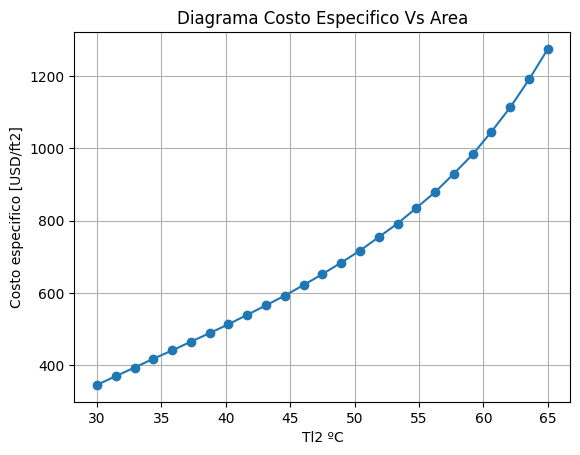

In [266]:
plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['costo_intercambiador_especifico'],
    marker='o'
)
plt.xlabel('Tl2 ºC')
plt.ylabel('Costo especifico [USD/ft2]')
plt.title("Diagrama Costo Especifico Vs Area")
plt.grid(True)
plt.show()

In [267]:
# Define the power law function
def power_law(x, A, B):
    return A * (x ** B)

In [268]:
# Perform curve fitting to find A and B
params, covariance = curve_fit(
    power_law, 
    tabla_costos['Area ft^2'].to_numpy(),
    tabla_costos["costo_intercambiador_especifico"].to_numpy()
)

In [269]:
# Extract the values of A and B
K, n = params

m = 1 + n
print("k =", K)
print("m =", m)
print("n =", n)

k = 8239.894895697298
m = 0.3674849729890127
n = -0.6325150270109873


In [279]:
tabla_costos['costo_prediccion_intercambiador'] =  K * (tabla_costos['Area ft^2'] ** (m))

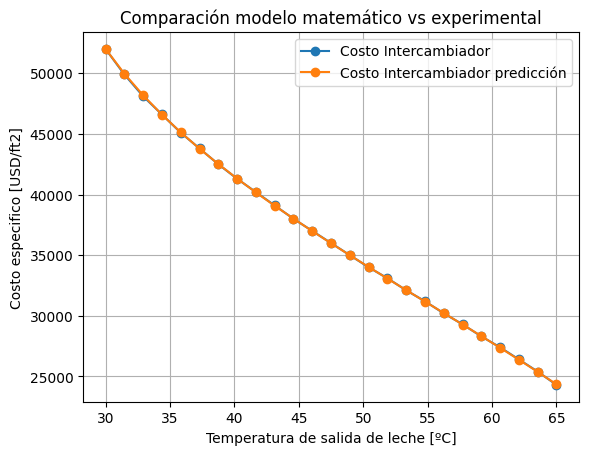

In [271]:
plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['costo_intercambiador matches'],
    marker='o',
    label='Costo Intercambiador'
)

plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['costo_prediccion_intercambiador'],
    marker='o',
    label='Costo Intercambiador predicción'
)

plt.xlabel('Temperatura de salida de leche [ºC]')
plt.ylabel('Costo especifico [USD/ft2]')
plt.title("Comparación modelo matemático vs experimental")
plt.legend()
plt.grid()
plt.show()

### Cálculo  Ciclo refrigerador

<!-- <p align="center">
  <img src="ciclo_refrigerador.jpg" height ="300px">
</p> -->

![](ciclo_refrigerador.jpg)

#### Costo del refrigerador

$$ \dot{Q} = (\dot{m} *C_{p})_{leche} * (T_{entrada} -T_{salida})$$

$$ (n  Watts )\frac{3.41 Btu/h}{1 Watts} *\frac{1 MBtu/h}{1*10^{6}Btu/h}$$

In [272]:
calores_refrigerador = caudal_leche * cp_leche_kern * (temperaturas_leche_estimada_salidas - temperatura_salida_leche)
print(f"Calor transmitido al refrigerador {calores_refrigerador} W")

calores_refrigerador_ingles = calores_refrigerador * 3.41214 / 1e6
print(f"Calor transmitido al refrigerador {calores_refrigerador_ingles} M Btu/h")

Calor transmitido al refrigerador [ 39000.    41843.75  44687.5   47531.25  50375.    53218.75  56062.5
  58906.25  61750.    64593.75  67437.5   70281.25  73125.    75968.75
  78812.5   81656.25  84500.    87343.75  90187.5   93031.25  95875.
  98718.75 101562.5  104406.25 107250.  ] W
Calor transmitido al refrigerador [0.13307346 0.14277673 0.15248001 0.16218328 0.17188655 0.18158983
 0.1912931  0.20099637 0.21069964 0.22040292 0.23010619 0.23980946
 0.24951274 0.25921601 0.26891928 0.27862256 0.28832583 0.2980291
 0.30773238 0.31743565 0.32713892 0.3368422  0.34654547 0.35624874
 0.36595202] M Btu/h


In [273]:
tabla_costos['costo_refrigeradores'] = [
    41100,
    43200,
    45200,
    47200,
    49100,
    51000,
    52900,
    54800,
    56600,
    58400,
    60100,
    61900,
    63600,
    65300,
    67000,
    68700,
    70400,
    72000,
    73600,
    75200,
    76800,
    78400,
    80000,
    81500,
    83000
][::1]

In [282]:
n = 5 # 5 añoS
g = 0.08
i = 0.2 

PSA = (
    1 - ((1 + g) / (1 + i)) ** n
) / (i - g)
PSA

3.4125833333333295

In [283]:
COP = 1

trabajo_compresor = calores_refrigerador * COP
# print(f"Trabajo compresor {trabajo_compresor} W")

trabajo_compresor_hp = trabajo_compresor  / 745.7
print(f"Trabajo compresor {trabajo_compresor_hp} hp")

horas = 300 * 24
CEE = 0.25

C_q = trabajo_compresor_hp * horas * CEE * PSA / 1000


Trabajo compresor [ 52.29985249  56.1133834   59.92691431  63.74044522  67.55397613
  71.36750704  75.18103795  78.99456886  82.80809977  86.62163068
  90.43516159  94.2486925   98.06222341 101.87575432 105.68928524
 109.50281615 113.31634706 117.12987797 120.94340888 124.75693979
 128.5704707  132.38400161 136.19753252 140.01106343 143.82459434] hp


In [284]:
tabla_costos['Costo Total'] = tabla_costos['costo_prediccion_intercambiador'] \
                            + tabla_costos['costo_refrigeradores'] \
                            + C_q

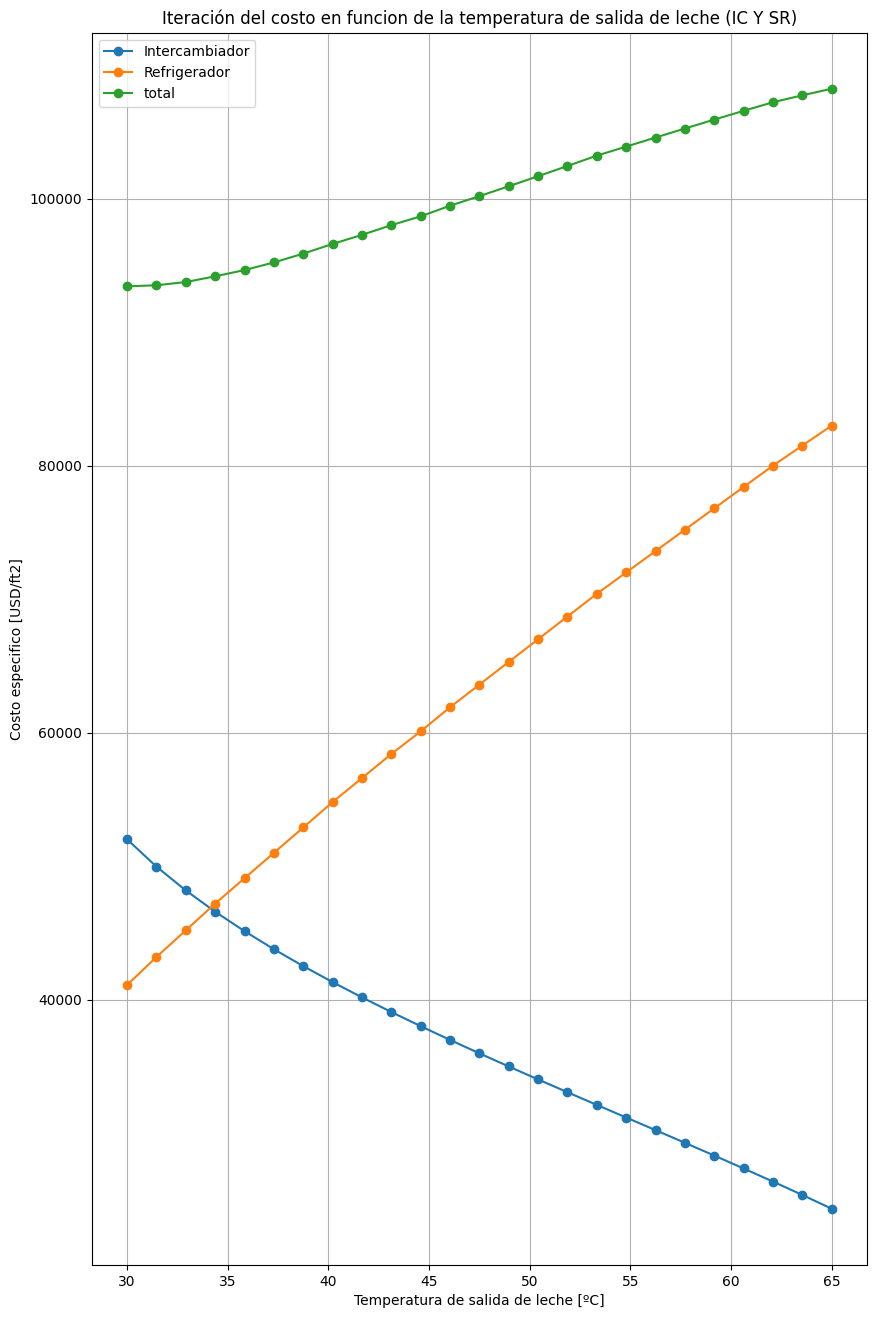

In [285]:
plt.figure(figsize=(10,16))

plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['costo_prediccion_intercambiador'],
    marker='o',
    label='Intercambiador'
)

plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['costo_refrigeradores'],
    marker='o',
    label='Refrigerador'
)

plt.plot(
    tabla_costos['Tl2 ºC'],
    tabla_costos['Costo Total'],
    marker='o',
    label='total'
)



plt.xlabel('Temperatura de salida de leche [ºC]')
plt.ylabel('Costo especifico [USD/ft2]')

plt.title('Iteración del costo en funcion de la temperatura de salida de leche (IC Y SR)')
plt.legend()
plt.grid()
plt.show()

## Diseño solo sistema refrigerador 

### Refrigerador

In [275]:
calor_refrigerador = caudal_leche * cp_leche_kern * (temperatura_entrada_leche - temperatura_salida_leche)
print(f"Calor transmitido al refrigerador {calor_refrigerador} W")

Calor transmitido al refrigerador 136500.0 W


In [276]:
calor_refrigerador_ingles = calor_refrigerador    * 3.41214 / 1e6
print(f"Calor transmitido al refrigerador {calor_refrigerador_ingles} M Btu/h")

Calor transmitido al refrigerador 0.46575711 M Btu/h


In [277]:
print(f"precio: 98200 USD")

precio: 98200 USD


# Referencias
- Abigail , O. (2023) Principales Productores de Café del Mundo en 2022, Statista. Available at: https://es.statista.com/estadisticas/600243/ranking-de-los-principales-productores-de-cafe-a-nivel-mundial/#:~:text=Ranking%20de%20los%20principales%20productores%20de%20café%20a%20nivel%20mundial%20en%202022&amp;text=Brasil%20encabezó%20la%20clasificación%20mundial,kilogramos%20durante%20el%20año%20referido. (Accessed: 27 October 2023). 
- Seguros, V. (2021) Presión del Agua en Casa: Problemas habituales: Blog Verti, Verti Blog. Available at: https://blog.verti.es/hogar/presion-agua-casa/#:~:text=Lo%20habitual%20es%20que%20la,tengamos%20una%20presión%20u%20otra. (Accessed: 13 October 2023). 
- Bell, I.H. et al. (2014) ‘Pure and pseudo-pure fluid thermophysical property evaluation and the open-source Thermophysical Property Library coolprop’, Industrial &amp;amp; Engineering Chemistry Research, 53(6), pp. 2498–2508. doi:10.1021/ie4033999. 